<a href="https://colab.research.google.com/github/aishwaryabadge/Lead-scoring-case-study/blob/main/Time_series_Project_(submitted_note_book).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn  as sns 
from time import time

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_store = pd.read_csv('/content/drive/MyDrive/Time_series_Capstone_project/Dataset (1).zip (Unzipped Files)/store.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Time_series_Capstone_project/Dataset (1).zip (Unzipped Files)/train.csv')


In [ ]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Merging store data with train to improve the richness of the data

In [ ]:
#Merging two dataframes train and store

df_new= pd.merge(df_train, df_store, on='Store', how='inner')
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### **Selecting rows with Store ID :1,3,8,9,13,25,29,31 and 46.**

In [ ]:
# taking the data with store id =1,3,8,9,13,25,29,31 and 46.

df_new = df_new[df_new["Store"].isin([1,3,8,9,13,25,29,31,46])]

In [ ]:
df_new.Store.unique()

array([ 1,  3,  8,  9, 13, 25, 29, 31, 46])

## **Data Cleaning**

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8110 entries, 0 to 42043
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      8110 non-null   int64  
 1   DayOfWeek                  8110 non-null   int64  
 2   Date                       8110 non-null   object 
 3   Sales                      8110 non-null   int64  
 4   Customers                  8110 non-null   int64  
 5   Open                       8110 non-null   int64  
 6   Promo                      8110 non-null   int64  
 7   StateHoliday               8110 non-null   object 
 8   SchoolHoliday              8110 non-null   int64  
 9   StoreType                  8110 non-null   object 
 10  Assortment                 8110 non-null   object 
 11  CompetitionDistance        8110 non-null   float64
 12  CompetitionOpenSinceMonth  6410 non-null   float64
 13  CompetitionOpenSinceYear   6410 non-null   floa

In [ ]:
df_new['Date'] = pd.to_datetime(df_new['Date'],errors="coerce")


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8110 entries, 0 to 42043
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      8110 non-null   int64         
 1   DayOfWeek                  8110 non-null   int64         
 2   Date                       8110 non-null   datetime64[ns]
 3   Sales                      8110 non-null   int64         
 4   Customers                  8110 non-null   int64         
 5   Open                       8110 non-null   int64         
 6   Promo                      8110 non-null   int64         
 7   StateHoliday               8110 non-null   object        
 8   SchoolHoliday              8110 non-null   int64         
 9   StoreType                  8110 non-null   object        
 10  Assortment                 8110 non-null   object        
 11  CompetitionDistance        8110 non-null   float64       
 12  Compe

In [ ]:
df_new.isnull().sum()

Store                           0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance             0
CompetitionOpenSinceMonth    1700
CompetitionOpenSinceYear     1700
Promo2                          0
Promo2SinceWeek              5652
Promo2SinceYear              5652
PromoInterval                5652
dtype: int64

In [ ]:
df_new.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,6410.000000,6410.000000,8110.000000,2458.000000,2458.000000
mean,17.826634,3.998520,5394.031566,590.330210,0.823798,0.381258,0.177435,4479.442663,8.412168,2006.910452,0.303083,23.559805,2010.383238
std,13.989612,1.997532,3455.976814,421.269874,0.381016,0.485726,0.382060,4714.857046,2.352367,4.603190,0.459619,14.319480,0.923837
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000,4.000000,2000.000000,0.000000,14.000000,2009.000000
25%,8.000000,2.000000,3792.250000,421.000000,1.000000,0.000000,0.000000,1200.000000,7.000000,2003.000000,0.000000,14.000000,2009.000000
50%,13.000000,4.000000,5406.000000,573.000000,1.000000,0.000000,0.000000,2030.000000,9.000000,2006.000000,0.000000,14.000000,2011.000000
75%,29.000000,6.000000,7252.500000,720.000000,1.000000,1.000000,0.000000,7520.000000,10.000000,2012.000000,1.000000,45.000000,2011.000000
max,46.000000,7.000000,24882.000000,2835.000000,1.000000,1.000000,1.000000,14130.000000,12.000000,2014.000000,1.000000,45.000000,2011.000000


### Removing columns with more than 40% of null values

In [ ]:
df_new.loc[:,df_new.isnull().mean()>=0.40].columns

Index(['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], dtype='object')

In [ ]:
#removing these columns from store dataset
df_new = df_new.loc[:,df_new.isnull().mean()<0.40]

### Looking for highly skewed columns

In [ ]:
# looking for the columns in store dataset which are highly skewed
skewed_cols = np.array([np.any(df_new[col].value_counts(normalize = True)>=0.99) for col in df_new.columns])
df_new.loc[:,skewed_cols].columns

Index([], dtype='object')

- This shows we dont have columns which are highly skewed columns

### Looking for outliers and then removing outliers with 0.99 percentile

In [ ]:
df_new.quantile(0.99)

Store                           46.00
DayOfWeek                        7.00
Sales                        14810.28
Customers                     1929.91
Open                             1.00
Promo                            1.00
SchoolHoliday                    1.00
CompetitionDistance          14130.00
CompetitionOpenSinceMonth       12.00
CompetitionOpenSinceYear      2014.00
Promo2                           1.00
Name: 0.99, dtype: float64

In [ ]:
# removing outliers for sales
min_threshold,max_threshold = df_new.Sales.quantile([0.001,0.99])
min_threshold,max_threshold

(0.0, 14810.279999999999)

In [ ]:
df2=df_new[(df_new.Sales<max_threshold)&(df_new.Sales>min_threshold)]

In [ ]:
df_new.shape

(8110, 15)

In [ ]:
df2.shape

(6597, 15)

In [ ]:
# removing outliers for competition distance
min_threshold,max_threshold = df2.CompetitionDistance.quantile([0.001,0.99])
min_threshold,max_threshold


df3=df2[(df2.CompetitionDistance<max_threshold)&(df2.CompetitionDistance>min_threshold)]

In [ ]:
df3.shape

(5198, 15)

In [ ]:
# removing outliers for customers
min_threshold,max_threshold = df3.Customers.quantile([0.001,0.99])
min_threshold,max_threshold


df4=df3[(df3.Customers<max_threshold)&(df3.Customers>min_threshold)]

In [ ]:
df4.shape

(5140, 15)

In [ ]:
df4.isnull().sum()

Store                          0
DayOfWeek                      0
Date                           0
Sales                          0
Customers                      0
Open                           0
Promo                          0
StateHoliday                   0
SchoolHoliday                  0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    773
CompetitionOpenSinceYear     773
Promo2                         0
dtype: int64

In [ ]:
print(df4.CompetitionOpenSinceMonth.value_counts())
# here 8 month has the highest value so fill null by 8
df4['CompetitionOpenSinceMonth'].fillna(8,inplace=True)

9.0     1403
7.0      784
10.0     780
8.0      779
4.0      621
Name: CompetitionOpenSinceMonth, dtype: int64


In [ ]:
print(df4.CompetitionOpenSinceYear.value_counts())
# Since most of the competition are open since 2012 we replace nan by median
df4['CompetitionOpenSinceYear'].fillna(2012,inplace=True)


2012.0    784
2008.0    781
2014.0    780
2000.0    779
2005.0    622
2003.0    621
Name: CompetitionOpenSinceYear, dtype: int64


In [ ]:
df4.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [ ]:
df4.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
count,5140.000000,5140.000000,5140.000000,5140.000000,5140.0,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000,5140.000000
mean,20.406615,3.535798,6443.331128,719.592023,1.0,0.438132,0.193969,3660.093385,7.940661,2007.942607,0.121012
std,14.504491,1.706210,2316.953178,314.876898,0.0,0.496206,0.395443,3407.468445,1.721226,4.911239,0.326173
min,1.000000,1.000000,1890.000000,284.000000,1.0,0.000000,0.000000,430.000000,4.000000,2000.000000,0.000000
25%,8.000000,2.000000,4798.000000,537.000000,1.0,0.000000,0.000000,1270.000000,7.000000,2003.000000,0.000000
50%,25.000000,4.000000,5923.500000,616.000000,1.0,0.000000,0.000000,2030.000000,8.000000,2008.000000,0.000000
75%,31.000000,5.000000,7674.250000,746.000000,1.0,1.000000,0.000000,7520.000000,9.000000,2012.000000,0.000000
max,46.000000,6.000000,14784.000000,1846.000000,1.0,1.000000,1.000000,9800.000000,10.000000,2014.000000,1.000000


### We cannot see any outliers now ^


In [ ]:
df4['CompetitionOpenSinceMonth']=df4['CompetitionOpenSinceMonth'].astype('int')

In [ ]:
df4.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9,2008.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9,2008.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9,2008.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9,2008.0,0


In [ ]:
# Here any of the 9 shop is not open on StateHoliday so we remove this column since it has only one value that is 0
df4.StateHoliday.value_counts()
df4.drop('StateHoliday',axis=1,inplace=True)

In [ ]:
# since all the shops are given value 1 i.e open , this column is deleted
df4.Open.unique()
df4.drop('Open',axis=1,inplace=True)

In [ ]:
print('SchoolHoliday:',df4.SchoolHoliday.unique())
print('StoreType:',df4.StoreType.unique())
print('Assortment:', df4.Assortment.unique())
print('Promo2:', df4.Promo2.unique())
print('Promo:', df4.Promo.unique())

SchoolHoliday: [1 0]
StoreType: ['c' 'a' 'd']
Assortment: ['a' 'c']
Promo2: [0 1]
Promo: [1 0]


In [ ]:
df4.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,1,c,a,1270.0,9,2008.0,0
1,1,4,2015-07-30,5020,546,1,1,c,a,1270.0,9,2008.0,0
2,1,3,2015-07-29,4782,523,1,1,c,a,1270.0,9,2008.0,0
3,1,2,2015-07-28,5011,560,1,1,c,a,1270.0,9,2008.0,0
4,1,1,2015-07-27,6102,612,1,1,c,a,1270.0,9,2008.0,0


In [ ]:
df4= df4.set_index('Date')  
df4.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,c,a,1270.0,9,2008.0,0
2015-07-30,1,4,5020,546,1,1,c,a,1270.0,9,2008.0,0
2015-07-29,1,3,4782,523,1,1,c,a,1270.0,9,2008.0,0
2015-07-28,1,2,5011,560,1,1,c,a,1270.0,9,2008.0,0
2015-07-27,1,1,6102,612,1,1,c,a,1270.0,9,2008.0,0


In [ ]:
df4.shape

(5140, 12)

## EDA


In [ ]:
store1 =  pd.DataFrame(df4[df4['Store'].isin([1])])


In [ ]:
store1.head()


,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,c,a,1270.0,9,2008.0,0
2015-07-30,1,4,5020,546,1,1,c,a,1270.0,9,2008.0,0
2015-07-29,1,3,4782,523,1,1,c,a,1270.0,9,2008.0,0
2015-07-28,1,2,5011,560,1,1,c,a,1270.0,9,2008.0,0
2015-07-27,1,1,6102,612,1,1,c,a,1270.0,9,2008.0,0


In [ ]:
store1.shape

(781, 12)

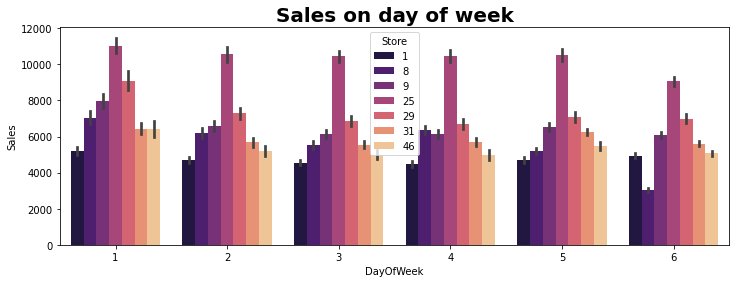

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x='DayOfWeek' ,y='Sales' , data = df4 , palette='magma',hue='Store')
plt.title('Sales on day of week',fontweight='bold',size=20)
plt.show()


- StoreId : 25 has highest sales out of the other targeted stores.And of all the days its sales is more on monday.
- Out of all the stores store with Id 8 marks lowest sales , on sunday.No other stores sales goes this low in any day of the week.

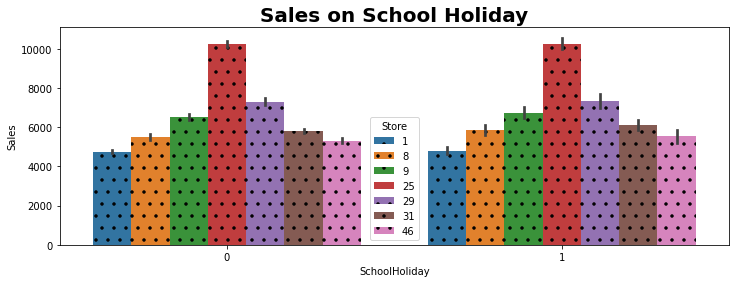

In [ ]:
# Sales on school holidays

plt.figure(figsize=(12, 4))


sns.barplot(y='Sales',x='SchoolHoliday', data=df4,hatch='.',hue='Store')
plt.title("Sales on School Holiday",fontweight='bold',size=20)

plt.show()



***School Holiday***
- The storeid:25 has highest sales even on schoolholidays.
- Overall the sales of targeted store on or no  schoolholiday is same.


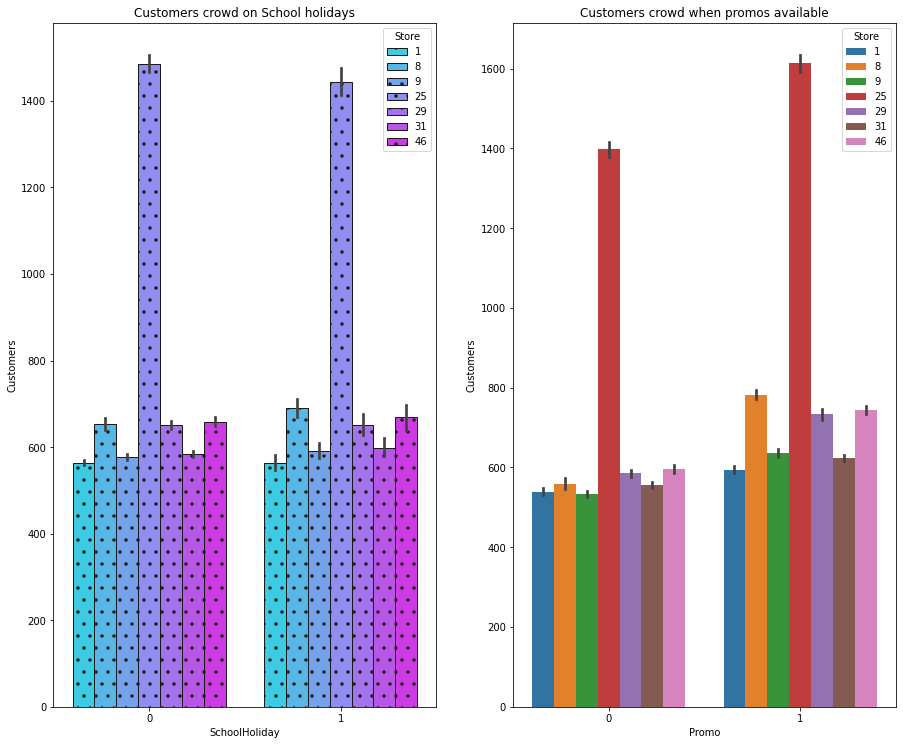

In [ ]:
# looking for Customers crowd on  school holidays
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.barplot(x='SchoolHoliday', y='Customers',data=df4 ,palette='cool',hatch='.',hue='Store',edgecolor='.1')
plt.title('Customers crowd on School holidays')

plt.subplot(1,2,2)
sns.barplot(x='Promo', y='Customers',data=df4,hue='Store')
plt.title('Customers crowd when promos available')

plt.subplots_adjust(right=1.1)
plt.subplots_adjust(top=2.5)
plt.show()



- Customers crowd is more for storeid:25  , but its crowd is tittle less when it has no promos available. 

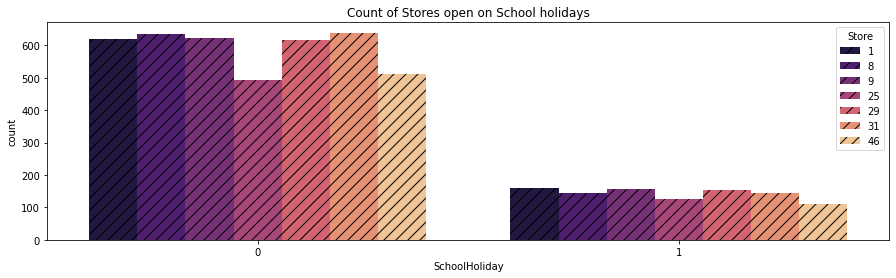

In [ ]:
plt.figure(figsize=(12,4))

sns.countplot(x='SchoolHoliday', data=df4 , palette='magma',hatch='//',hue='Store')
plt.title('Count of Stores open on School holidays')

plt.subplots_adjust(right=1.1)
plt.show()

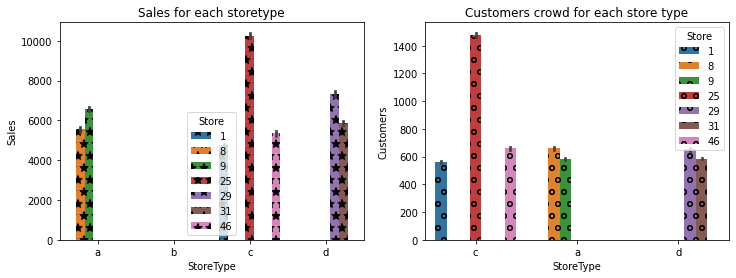

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x= df4.StoreType, y=df4.Sales,data=df4,hatch='*',order=['a','b','c','d'],hue="Store")
plt.title('Sales for each storetype')


plt.subplot(1,2,2)
sns.barplot(x=df4.StoreType, y=df4.Customers,data=df4 ,hatch='o',hue='Store')
plt.title('Customers crowd for each store type')

plt.show()

- Storeid: 25 is the store type c , which has highest customers hence highest sales.
- 29 and 31 storeid are of d type.
-46 and 1 storeid are  of c type.
-store with id 8 and 9 are of a type

In [ ]:
print("Promo:",df4.Promo.value_counts())
print('------------------------')
print("Promo2:",df4.Promo2.value_counts())

Promo: 0    2888
1    2252
Name: Promo, dtype: int64
------------------------
Promo2: 0    4518
1     622
Name: Promo2, dtype: int64


### looking for the impact of promo and promo2 on sales using visualization

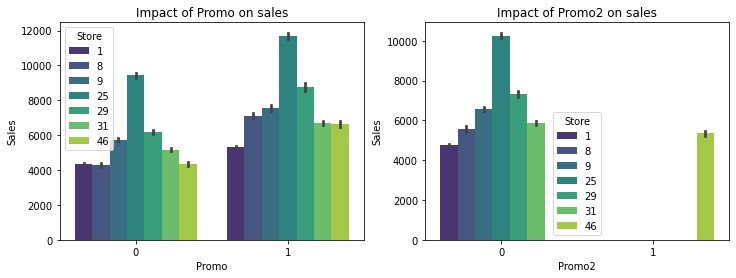

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x= df4.Promo, y=df4.Sales,data=df4,palette='viridis',hue="Store")
plt.title('Impact of Promo on sales')


plt.subplot(1,2,2)
sns.barplot(x=df4.Promo2, y=df4.Sales,data=df4 ,palette='viridis',hue="Store")
plt.title('Impact of Promo2 on sales')

plt.show()

- The plot above shows that promo has good impact on sales as sales count is more for stores using promo
- Incase of promo2 , sales for the stores not participating is good then those participating.

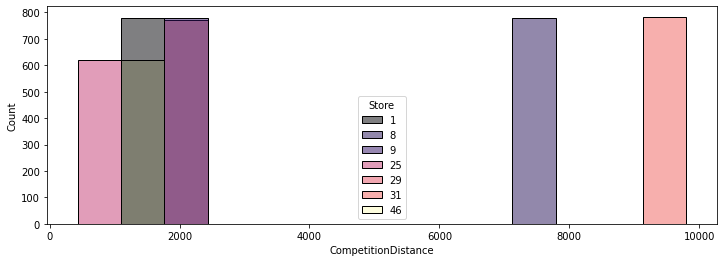

In [ ]:
# Competition distance
plt.figure(figsize=(12,4))
sns.histplot(x='CompetitionDistance',data=df4,kde=True,hue="Store",legend=True,palette='magma')
plt.show()

- Most of stores has competition in distance of aorund 3km

Text(0.5, 1.0, 'Assortment')

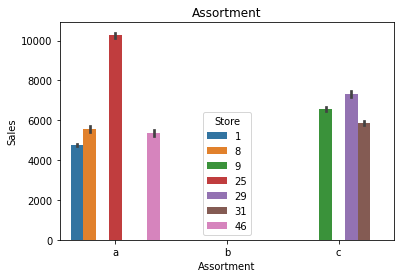

In [ ]:
sns.barplot(x='Assortment',y='Sales',data=df4 ,order=['a','b','c'],hue='Store')
plt.title('Assortment')

- The stores with ID 25,46,1,8 has assortment type a.
- And 29,9,31 are of assortment c.

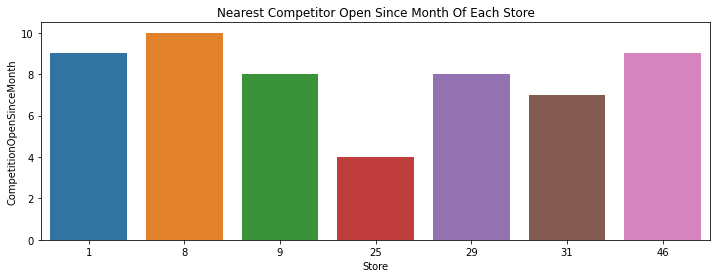

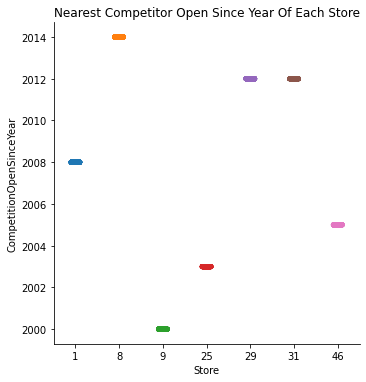

In [ ]:
plt.figure(figsize=(12,4))

#plt.subplot(1,2,1)
sns.barplot(y='CompetitionOpenSinceMonth',x='Store',data=df4)
plt.title('Nearest Competitor Open Since Month Of Each Store')

#plt.subplot(1,2,2)
sns.catplot(x='Store',y='CompetitionOpenSinceYear',data = df4)
plt.title('Nearest Competitor Open Since Year Of Each Store')

plt.show()

The above graph shows the month and year from when they have the nearest competitor.

**Competion since month**
-store1 has from 9 months , store8 has from 10 months,store9 has from 8 months,store25 has from 4 months, store29 has from 8 months ,store 31 has from 7 months , store46 has from 9 months

**Competion since Year**
-store1 has from 2008 , store8 has from 2014, store9 has from 2000 ,store25 has from 2003, store29 has from 2012 ,store 31 has from 2012 , store46 has from 2005.


### **EDA Conclusion**


1.School holiday has no impact on sales.

2.Impact of Promo on sales is good as compared to Promo2.

3.Store with StoreId:25 has highest sales where as its competitors are since very less year in the market.

4.Store with StoreId:1 has lowest sales.

5.Store with StoreId:8 has competitor since many years more than other stores, and its sales is average.



In [ ]:
#Importing libraries
from scipy import stats
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.vecm import coint_johansen 

In [ ]:
print('SchoolHoliday:',df4.SchoolHoliday.unique())
print('StoreType:',df4.StoreType.unique())
print('Assortment:', df4.Assortment.unique())
print('Promo2:', df4.Promo2.unique())
print('Promo:', df4.Promo.unique())

SchoolHoliday: [1 0]
StoreType: ['c' 'a' 'd']
Assortment: ['a' 'c']
Promo2: [0 1]
Promo: [1 0]


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5140 entries, 2015-07-31 to 2013-01-02
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      5140 non-null   int64  
 1   DayOfWeek                  5140 non-null   int64  
 2   Sales                      5140 non-null   int64  
 3   Customers                  5140 non-null   int64  
 4   Promo                      5140 non-null   int64  
 5   SchoolHoliday              5140 non-null   int64  
 6   StoreType                  5140 non-null   object 
 7   Assortment                 5140 non-null   object 
 8   CompetitionDistance        5140 non-null   float64
 9   CompetitionOpenSinceMonth  5140 non-null   int64  
 10  CompetitionOpenSinceYear   5140 non-null   float64
 11  Promo2                     5140 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 522.0+ KB


In [ ]:
# converting object to categorical  and then mapping
df4['SchoolHoliday'] =df4['SchoolHoliday'].astype('category')
df4['Promo2']=df4['Promo2'].astype('category')
df4['StoreType']=df4['StoreType'].astype('category')
df4['Assortment'] =df4['Assortment'].astype('category')


Mapping of Storetype and Assortment

In [ ]:
df4['StoreType'] =df4['StoreType'].map({"a":0 ,'c':1,"d":2})



In [ ]:
df4['Assortment']= df4['Assortment'].map({'a':1,'c':2})

In [ ]:
df4.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,1,1,1270.0,9,2008.0,0
2015-07-30,1,4,5020,546,1,1,1,1,1270.0,9,2008.0,0
2015-07-29,1,3,4782,523,1,1,1,1,1270.0,9,2008.0,0
2015-07-28,1,2,5011,560,1,1,1,1,1270.0,9,2008.0,0
2015-07-27,1,1,6102,612,1,1,1,1,1270.0,9,2008.0,0


In [ ]:
#Converting categorical to int
df4['SchoolHoliday'] =df4['SchoolHoliday'].astype('int')
df4['Promo2']=df4['Promo2'].astype('int')
df4['StoreType']=df4['StoreType'].astype('int')
df4['Assortment'] =df4['Assortment'].astype('int')


In [ ]:
# These are the targetted storeid of which forecast is to  be obtained.
3,8,9,13,25,29,31,46

(3, 8, 9, 13, 25, 29, 31, 46)

# **Model building for Store1**

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


In [ ]:
store1= df4[df4["Store"].isin([1])]
store1.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,1,1,1270.0,9,2008.0,0
2015-07-30,1,4,5020,546,1,1,1,1,1270.0,9,2008.0,0
2015-07-29,1,3,4782,523,1,1,1,1,1270.0,9,2008.0,0
2015-07-28,1,2,5011,560,1,1,1,1,1270.0,9,2008.0,0
2015-07-27,1,1,6102,612,1,1,1,1,1270.0,9,2008.0,0


In [ ]:
# Looking for the stationarity
for i in range(len(store1.columns)):
    result= adfuller(store1[store1.columns[i]])
    
    if result[1] > 0.05:
        print('{}- series is not stationary'.format(store1.columns[i]))
    else:
        print('{}- series is stationary'.format(store1.columns[i]))
    

Store- series is stationary
DayOfWeek- series is stationary
Sales- series is stationary
Customers- series is stationary
Promo- series is stationary
SchoolHoliday- series is stationary
StoreType- series is stationary
Assortment- series is stationary
CompetitionDistance- series is stationary
CompetitionOpenSinceMonth- series is stationary
CompetitionOpenSinceYear- series is stationary
Promo2- series is stationary


In [ ]:
store1.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

In [ ]:
ls= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2']
for i in range(len(ls)):
    print('\n\n' + ls[i] + ': ADF test results:')
    result = adfuller(store1[ls[i]].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))
            




Store: ADF test results:
ADF Statistic: nan
p-value: nan
Critical Values:
	5%: -2.865


DayOfWeek: ADF test results:
ADF Statistic: -8.686197
p-value: 0.000000
Critical Values:
	5%: -2.865


Sales: ADF test results:
ADF Statistic: -5.412786
p-value: 0.000003
Critical Values:
	5%: -2.865


Customers: ADF test results:
ADF Statistic: -4.314366
p-value: 0.000419
Critical Values:
	5%: -2.865


Promo: ADF test results:
ADF Statistic: -6.789654
p-value: 0.000000
Critical Values:
	5%: -2.865


SchoolHoliday: ADF test results:
ADF Statistic: -5.882412
p-value: 0.000000
Critical Values:
	5%: -2.865


StoreType: ADF test results:
ADF Statistic: nan
p-value: nan
Critical Values:
	5%: -2.865


Assortment: ADF test results:
ADF Statistic: nan
p-value: nan
Critical Values:
	5%: -2.865


CompetitionDistance: ADF test results:
ADF Statistic: nan
p-value: nan
Critical Values:
	5%: -2.865


CompetitionOpenSinceMonth: ADF test results:
ADF Statistic: nan
p-value: nan
Critical Values:
	5%: -2.865


Comp

In [ ]:
store1.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Promo                        0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

As it shows nan p value for categorical variables we consider only some of the columns for furthe procedure i.e Dayofweek, Sales ,Customers, Promo School Holiday

In [ ]:
store1 = store1[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']]

In [ ]:
 store1 = store1.sort_index()


In [ ]:
store1.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-12',
               ...
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=781, freq=None)

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
train1 = store1.loc['2013-1-02':'2015-1-02']
test1 = store1.loc['2015-1-02':]
train1.head()
                       

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
Date,,,,,
2013-01-02,3,5530,668,0,1
2013-01-03,4,4327,578,0,1
2013-01-04,5,4486,619,0,1
2013-01-05,6,4997,635,0,1
2013-01-07,1,7176,785,1,1


In [ ]:
print('shape of train1:',train1.shape)

print('shape of test1:',test1.shape)

shape of train1: (607, 5)
shape of test1: (175, 5)


In [ ]:
df5 = train1.copy()
test_1 = test1.copy()


1.   Train data is df5
2.   Test data is test_1



In [ ]:
df5.head(20)

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
Date,,,,,
2013-01-02,3,5530,668,0,1
2013-01-03,4,4327,578,0,1
2013-01-04,5,4486,619,0,1
2013-01-05,6,4997,635,0,1
2013-01-07,1,7176,785,1,1
2013-01-08,2,5580,654,1,1
2013-01-09,3,5471,626,1,1
2013-01-10,4,4892,615,1,1
2013-01-11,5,4881,592,1,1


In [ ]:
test_1.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
Date,,,,,
2015-01-02,5,5509,657,0,1
2015-01-03,6,5023,645,0,1
2015-01-05,1,6239,712,1,1
2015-01-06,2,4574,595,1,1
2015-01-07,3,4796,603,1,1


- The above Dayofweek, customers, promo , school holiday  these variables influence the Sales of the store so we consider them for further procedure 

In [ ]:
model = VAR(df5)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  14.589878526304782
BIC :  14.808040901852767
FPE :  2169227.6961895213
HQIC:  14.674766883808996 

Lag Order = 2
AIC :  13.797222259771436
BIC :  14.197697574137877
FPE :  981897.5940045251
HQIC:  13.953061278573932 

Lag Order = 3
AIC :  13.439604465016776
BIC :  14.022859325670394
FPE :  686709.3796024674
HQIC:  13.666586267111475 

Lag Order = 4
AIC :  12.797513752697034
BIC :  13.564016747152015
FPE :  361368.9181463095
HQIC:  13.095831292620495 

Lag Order = 5
AIC :  11.98272005420481
BIC :  12.932941761663526
FPE :  160009.56846893858
HQIC:  12.35256712397289 

Lag Order = 6
AIC :  11.816924265324252
BIC :  12.951337268407375
FPE :  135588.85265670915
HQIC:  12.258495499405846 

Lag Order = 7
AIC :  11.669298038644714
BIC :  12.988376935209558
FPE :  117010.57541470835
HQIC:  12.182788918972978 

Lag Order = 8
AIC :  11.676473675507848
BIC :  13.180695090555707
FPE :  117894.52193975072
HQIC:  12.262080536529199 

Lag Order = 9
AIC :  11.671762927139707
BIC :

- In the above output, the AIC drops to lowest at lag 1


In [ ]:
# An alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method.

x = model.select_order(12)
x.summary()

,AIC,BIC,FPE,HQIC
0,18.19,18.22,7.914e+07,18.20
1,14.56,14.78,2.103e+06,14.65
2,13.78,14.18,9.619e+05,13.93
3,13.42,14.01,6.741e+05,13.65
4,12.79,13.56,3.576e+05,13.09
5,11.98,12.94*,1.600e+05,12.36
6,11.81,12.95,1.348e+05,12.26
7,11.66,12.98,1.156e+05,12.17*
8,11.66,13.17,1.159e+05,12.25
9,11.65,13.35,1.150e+05,12.31


In [ ]:
result_var = model.fit(5)
result_var.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Jul, 2021
Time:                     17:51:04
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    12.9329
Nobs:                     602.000    HQIC:                   12.3526
Log likelihood:          -7747.80    FPE:                    160010.
AIC:                      11.9827    Det(Omega_mle):         129518.
--------------------------------------------------------------------
Results for equation DayOfWeek
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   15.312558         0.535685           28.585           0.000
L1.DayOfWeek            -0.427517         0.049751           -8.593           0.000
L1.Sales                -0.000219         0.

In [ ]:
# Get the lag order
lag_order = result_var.k_ar
print(lag_order)  #> 1

# Input data for forecasting
forecast_input = df5.values[-lag_order:]
forecast_input

5


array([[   6, 6057,  684,    0,    1],
       [   1, 6463,  700,    0,    1],
       [   2, 6466,  703,    0,    1],
       [   3, 2605,  327,    0,    1],
       [   5, 5509,  657,    0,    1]])

**Forcasted Table**

In [ ]:
fc = result_var.forecast(y=forecast_input, steps= 149)
df_forecast = pd.DataFrame(fc, index=test_1.index[-149:], columns= test_1.columns + '_fc')
df_forecast

,DayOfWeek_fc,Sales_fc,Customers_fc,Promo_fc,SchoolHoliday_fc
Date,,,,,
2015-02-02,4.728002,5074.805315,582.927601,0.101146,0.932082
2015-02-03,4.082409,5892.680497,655.094344,0.225134,0.900975
2015-02-04,2.016865,4869.514543,542.931049,0.670563,0.842004
2015-02-05,1.983448,5701.148081,616.570726,1.018858,0.848272
2015-02-06,3.348464,4983.875140,556.987029,1.014744,0.781353
...,...,...,...,...,...
2015-07-27,3.351693,4821.607738,572.299987,0.432963,0.224111
2015-07-28,3.334243,4795.941112,569.562365,0.447341,0.225811
2015-07-29,3.487690,4783.943454,568.708504,0.449960,0.225131


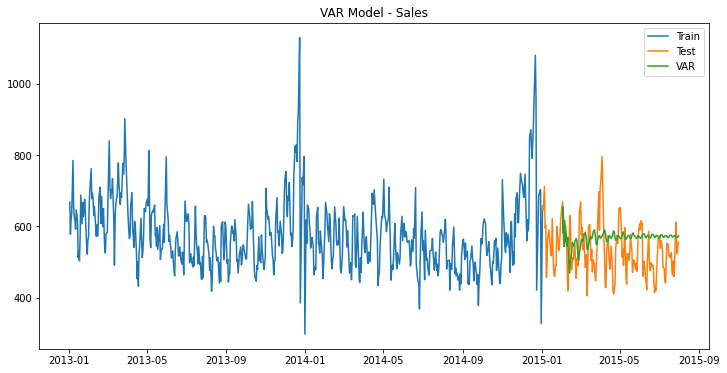

In [ ]:
plt.figure(figsize=(12,6)) 
plt.plot( df5['Customers'], label='Train')
plt.plot(test_1['Customers'], label='Test')
plt.plot(df_forecast['Customers_fc'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

## Cointegration 1

In [ ]:

joh_model1 = coint_johansen(store1[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)
traces = joh_model1.lr1
maxeig=joh_model1.lr2
cvts = joh_model1.cvt  ## 0: 90%  1:95% 2: 99%
cvms = joh_model1.cvm   ## 0: 90%  1:95% 2: 99%


In [ ]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

rank=select_coint_rank(store1[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)
print(rank.rank)


4


In [ ]:
print('cointegration between DayOfWeek and Sales:',coint(store1['DayOfWeek'],store1['Sales']))
print('cointegration between DayOfWeek and Customers:',coint(store1['DayOfWeek'],store1['Customers']))
print('cointegration between DayOfWeek and Promo:',coint(store1['DayOfWeek'],store1['Promo']))
print('cointegration between DayOfWeek and SchoolHoliday:',coint(store1['DayOfWeek'],store1['SchoolHoliday']))
print('cointegration between Sales and Customers:',coint(store1['Sales'],store1['Customers']))
print('cointegration between Sales and Promo:',coint(store1['Sales'],store1['Promo']))
print('cointegration between Sales and SchoolHoliday:',coint(store1['Sales'],store1['SchoolHoliday']))
print('cointegration between Promo and Customers:',coint(store1['Promo'],store1['Customers']))
print('cointegration between Promo and SchoolHoliday:',coint(store1['Promo'],store1['SchoolHoliday']))
print('cointegration between Customers and SchoolHoliday:',coint(store1['Customers'],store1['SchoolHoliday']))

cointegration between DayOfWeek and Sales: (-6.386115751636633, 2.281194272823446e-07, array([-3.910536  , -3.34397468, -3.04989191]))
cointegration between DayOfWeek and Customers: (-6.887940695658937, 1.5820428275733334e-08, array([-3.910536  , -3.34397468, -3.04989191]))
cointegration between DayOfWeek and Promo: (-9.086437436989684, 5.233582452989799e-14, array([-3.910536  , -3.34397468, -3.04989191]))
cointegration between DayOfWeek and SchoolHoliday: (-7.03612415294637, 7.038592013918289e-09, array([-3.910536  , -3.34397468, -3.04989191]))
cointegration between Sales and Customers: (-4.373995774050881, 0.0019578654723556147, array([-3.910536  , -3.34397468, -3.04989191]))
cointegration between Sales and Promo: (-5.18154386962275, 7.530094658743861e-05, array([-3.910536  , -3.34397468, -3.04989191]))
cointegration between Sales and SchoolHoliday: (-5.388379342487116, 2.9903265643201177e-05, array([-3.910536  , -3.34397468, -3.04989191]))
cointegration between Promo and Customers: 

Here Sales and customers , customers and Promo,SchoolHoliday and customers since there values are less that critical value nd hence null hypethesis is rejected.

# **Model building for StoreId 8**

In [ ]:
store8 = df4[df4["Store"].isin([8])]
store8.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2015-07-31,8,5,8492,833,1,1,0,1,7520.0,10,2014.0,0
2015-07-30,8,4,8420,882,1,1,0,1,7520.0,10,2014.0,0
2015-07-29,8,3,7029,698,1,1,0,1,7520.0,10,2014.0,0
2015-07-28,8,2,6717,695,1,1,0,1,7520.0,10,2014.0,0
2015-07-27,8,1,8739,841,1,1,0,1,7520.0,10,2014.0,0


In [ ]:
 store8 = store8.sort_index()


In [ ]:
store8.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2013-01-02,8,3,5419,698,0,1,0,1,7520.0,10,2014.0,0
2013-01-03,8,4,4842,662,0,1,0,1,7520.0,10,2014.0,0
2013-01-04,8,5,4059,517,0,1,0,1,7520.0,10,2014.0,0
2013-01-05,8,6,2337,312,0,0,0,1,7520.0,10,2014.0,0
2013-01-07,8,1,7416,802,1,0,0,1,7520.0,10,2014.0,0


In [ ]:
store8.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-12',
               ...
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=780, freq=None)

In [ ]:
store8 = store8[['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']]

In [ ]:
from sklearn.model_selection import train_test_split
train8 = store8.loc['2013-1-02':'2015-1-02']
test8 = store8.loc['2015-1-02':]
train8.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
Date,,,,,
2013-01-02,3,5419,698,0,1
2013-01-03,4,4842,662,0,1
2013-01-04,5,4059,517,0,1
2013-01-05,6,2337,312,0,0
2013-01-07,1,7416,802,1,0


In [ ]:
ls= ['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']
for i in range(len(ls)):
    print('\n\n' + ls[i] + ': ADF test results:')
    result = adfuller(train8[ls[i]].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))
            



DayOfWeek: ADF test results:
ADF Statistic: -13.178031
p-value: 0.000000
Critical Values:
	5%: -2.866


Sales: ADF test results:
ADF Statistic: -4.491009
p-value: 0.000204
Critical Values:
	5%: -2.866


Customers: ADF test results:
ADF Statistic: -3.597543
p-value: 0.005808
Critical Values:
	5%: -2.866


Promo: ADF test results:
ADF Statistic: -6.461752
p-value: 0.000000
Critical Values:
	5%: -2.866


SchoolHoliday: ADF test results:
ADF Statistic: -5.115017
p-value: 0.000013
Critical Values:
	5%: -2.866


In [ ]:
model = VAR(train8)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  16.556803781095756
BIC :  16.77552435384086
FPE :  15507076.852707582
HQIC:  16.641921956881266 

Lag Order = 2
AIC :  15.413037122724521
BIC :  15.81453869124856
FPE :  4940896.556380821
HQIC:  15.56929869125586 

Lag Order = 3
AIC :  14.18351690812373
BIC :  14.768268728098324
FPE :  1444941.676788637
HQIC:  14.411115104904086 

Lag Order = 4
AIC :  13.90392878254334
BIC :  14.672402107212553
FPE :  1092600.389317426
HQIC:  14.203057683050227 

Lag Order = 5
AIC :  13.364236301403928
BIC :  14.316904393367427
FPE :  636989.1121189249
HQIC:  13.73509082608545 

Lag Order = 6
AIC :  13.21756826975143
BIC :  14.354906412836396
FPE :  550196.6604292955
HQIC:  13.660344189060256 

Lag Order = 7
AIC :  13.116970372209712
BIC :  14.43945588343231
FPE :  497673.3444580214
HQIC:  13.631864311675049 

Lag Order = 8
AIC :  13.112847300899872
BIC :  14.620959542517097
FPE :  495801.08015524736
HQIC:  13.700056746237829 

Lag Order = 9
AIC :  13.142337780418767
BIC :  14.8365

In [ ]:
x8= model.select_order(12)
x8.summary()

,AIC,BIC,FPE,HQIC
0,19.31,19.34,2.427e+08,19.32
1,16.57,16.80,1.577e+07,16.66
2,15.44,15.84,5.065e+06,15.60
3,14.21,14.80,1.480e+06,14.44
4,13.95,14.72,1.138e+06,14.25
5,13.41,14.37*,6.653e+05,13.78
6,13.25,14.40,5.705e+05,13.70
7,13.15,14.48,5.142e+05,13.67*
8,13.14,14.65,5.074e+05,13.73
9,13.16,14.86,5.195e+05,13.82


In [ ]:
result_var8 = model.fit(5)
result_var8.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Jul, 2021
Time:                     17:51:05
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    14.3169
Nobs:                     600.000    HQIC:                   13.7351
Log likelihood:          -8136.09    FPE:                    636989.
AIC:                      13.3642    Det(Omega_mle):         515248.
--------------------------------------------------------------------
Results for equation DayOfWeek
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    8.283312         0.806582           10.270           0.000
L1.DayOfWeek            -0.021008         0.059573           -0.353           0.724
L1.Sales                -0.000160         0.

In [ ]:
# Get the lag order
lag_order = result_var8.k_ar
print(lag_order)  #> 1

# Input data for forecasting
forecast_input = train8.values[-lag_order:]
forecast_input

5


array([[   6, 3806,  502,    0,    0],
       [   1, 7086,  799,    0,    1],
       [   2, 6463,  759,    0,    1],
       [   3, 3025,  394,    0,    1],
       [   5, 5028,  639,    0,    1]])

In [ ]:
fc = result_var8.forecast(y=forecast_input, steps= 176)
df_forecast = pd.DataFrame(fc, index=test8.index[-176:], columns= test8.columns + '_fc')
df_forecast

,DayOfWeek_fc,Sales_fc,Customers_fc,Promo_fc,SchoolHoliday_fc
Date,,,,,
2015-01-02,3.679146,5860.100122,669.160124,0.439426,0.946767
2015-01-03,5.575107,3547.980123,409.676523,0.063613,0.773315
2015-01-05,1.491628,6203.425894,660.451953,0.558186,0.850543
2015-01-06,1.896194,7295.434258,824.053417,0.927687,0.821888
2015-01-07,3.264045,6054.254194,667.634530,0.953889,0.780017
...,...,...,...,...,...
2015-07-27,3.508125,5328.667327,641.272524,0.446616,0.210678
2015-07-28,3.484086,5336.264552,641.797724,0.447296,0.210909
2015-07-29,3.464245,5347.782721,643.171572,0.449304,0.211766


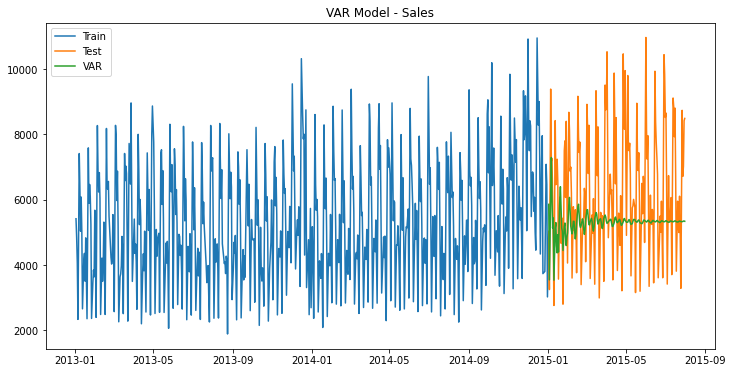

In [ ]:
plt.figure(figsize=(12,6)) 
plt.plot(train8['Sales'], label='Train')
plt.plot(test8['Sales'], label='Test')
plt.plot(df_forecast['Sales_fc'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

## Cointegration 8

In [ ]:
# applying Johansen test
joh_model1 = coint_johansen(store8[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)

traces = joh_model1.lr1
maxeig=joh_model1.lr2
cvts = joh_model1.cvt  ## 0: 90%  1:95% 2: 99%
cvms = joh_model1.cvm   ## 0: 90%  1:95% 2: 99%			

In [ ]:
# looking for the rank
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

rank=select_coint_rank(store8[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)
print(rank.rank)

4


In [ ]:
# with another method looking for cointegration
from statsmodels.tsa.stattools import coint
print('cointegration between DayOfWeek and Sales:',coint(store8['DayOfWeek'],store8['Sales']))

cointegration between DayOfWeek and Sales: (-2.9545486901775506, 0.12140843184951683, array([-3.91055417, -3.34398476, -3.0498989 ]))


In [ ]:
print('cointegration between DayOfWeek and Sales:',coint(store8['DayOfWeek'],store8['Sales']))
print('cointegration between DayOfWeek and Customers:',coint(store8['DayOfWeek'],store8['Customers']))
print('cointegration between DayOfWeek and Promo:',coint(store8['DayOfWeek'],store8['Promo']))
print('cointegration between DayOfWeek and SchoolHoliday:',coint(store8['DayOfWeek'],store8['SchoolHoliday']))
print('cointegration between Sales and Customers:',coint(store8['Sales'],store8['Customers']))
print('cointegration between Sales and Promo:',coint(store8['Sales'],store8['Promo']))
print('cointegration between Sales and SchoolHoliday:',coint(store8['Sales'],store8['SchoolHoliday']))
print('cointegration between Promo and Customers:',coint(store8['Promo'],store8['Customers']))
print('cointegration between Promo and SchoolHoliday:',coint(store8['Promo'],store8['SchoolHoliday']))
print('cointegration between Customers and SchoolHoliday:',coint(store8['Customers'],store8['SchoolHoliday']))

cointegration between DayOfWeek and Sales: (-2.9545486901775506, 0.12140843184951683, array([-3.91055417, -3.34398476, -3.0498989 ]))
cointegration between DayOfWeek and Customers: (-2.7363040578094724, 0.18679398026408411, array([-3.91055417, -3.34398476, -3.0498989 ]))
cointegration between DayOfWeek and Promo: (-7.948215724056407, 4.0755957561517673e-11, array([-3.91055417, -3.34398476, -3.0498989 ]))
cointegration between DayOfWeek and SchoolHoliday: (-6.900138458594246, 1.4805250896901482e-08, array([-3.91055417, -3.34398476, -3.0498989 ]))
cointegration between Sales and Customers: (-5.748861030490078, 5.539756314191873e-06, array([-3.91055417, -3.34398476, -3.0498989 ]))
cointegration between Sales and Promo: (-2.9204859739681486, 0.1303360546720928, array([-3.91055417, -3.34398476, -3.0498989 ]))
cointegration between Sales and SchoolHoliday: (-3.954458270742565, 0.008330301905750603, array([-3.91055417, -3.34398476, -3.0498989 ]))
cointegration between Promo and Customers: (-4

Here DayOfweek and Sales , Day of week and customers,sales and SchoolHoliday,promo and customers , customers and schoolday since there values are less that critical value nd hence null hypethesis is rejected.

# **Model building for StoreId 9**

In [ ]:
store9 = df4[df4["Store"].isin([9])]
store9.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2015-07-31,9,5,8565,687,1,1,0,2,2030.0,8,2000.0,0
2015-07-30,9,4,7539,651,1,1,0,2,2030.0,8,2000.0,0
2015-07-29,9,3,7776,625,1,1,0,2,2030.0,8,2000.0,0
2015-07-28,9,2,8751,678,1,1,0,2,2030.0,8,2000.0,0
2015-07-27,9,1,10649,777,1,1,0,2,2030.0,8,2000.0,0


In [ ]:
store9 = store9.sort_index()


In [ ]:
store9.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-12',
               ...
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=779, freq=None)

In [ ]:
store9 = store9[['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']]

In [ ]:
from sklearn.model_selection import train_test_split
train9 = store9.loc['2013-1-02':'2015-1-02']
test9 = store9.loc['2015-1-02':]
train9.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
Date,,,,,
2013-01-02,3,4903,481,0,1
2013-01-03,4,4602,453,0,1
2013-01-04,5,4798,497,0,1
2013-01-05,6,4254,450,0,0
2013-01-07,1,7574,605,1,0


In [ ]:
ls= ['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']
for i in range(len(ls)):
    print('\n\n' + ls[i] + ': ADF test results:')
    result = adfuller(train9[ls[i]].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))
            



DayOfWeek: ADF test results:
ADF Statistic: -7.441508
p-value: 0.000000
Critical Values:
	5%: -2.866


Sales: ADF test results:
ADF Statistic: -3.338200
p-value: 0.013255
Critical Values:
	5%: -2.866


Customers: ADF test results:
ADF Statistic: -3.033876
p-value: 0.031850
Critical Values:
	5%: -2.866


Promo: ADF test results:
ADF Statistic: -6.317403
p-value: 0.000000
Critical Values:
	5%: -2.866


SchoolHoliday: ADF test results:
ADF Statistic: -4.599374
p-value: 0.000130
Critical Values:
	5%: -2.866


In [ ]:
model = VAR(train9)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  15.749637372003285
BIC :  15.96835794474839
FPE :  6918023.322438741
HQIC:  15.834755547788795 

Lag Order = 2
AIC :  14.846853810018244
BIC :  15.248355378542282
FPE :  2804887.6681637354
HQIC:  15.003115378549582 

Lag Order = 3
AIC :  14.441777369604972
BIC :  15.026529189579566
FPE :  1870731.2929092192
HQIC:  14.669375566385328 

Lag Order = 4
AIC :  13.924896116894372
BIC :  14.693369441563584
FPE :  1115751.163867564
HQIC:  14.224025017401258 

Lag Order = 5
AIC :  13.230016232091566
BIC :  14.182684324055064
FPE :  556981.7606382068
HQIC:  13.600870756773089 

Lag Order = 6
AIC :  13.041170979984761
BIC :  14.178509123069727
FPE :  461221.538806243
HQIC:  13.483946899293587 

Lag Order = 7
AIC :  12.88144780374964
BIC :  14.203933314972238
FPE :  393240.48998648545
HQIC:  13.396341743214977 

Lag Order = 8
AIC :  12.850013873101869
BIC :  14.358126114719093
FPE :  381206.55617470306
HQIC:  13.437223318439825 

Lag Order = 9
AIC :  12.881333232250254
BIC :  

In [ ]:
x9= model.select_order(12)
x9.summary()

,AIC,BIC,FPE,HQIC
0,18.47,18.50,1.048e+08,18.48
1,15.75,15.98,6.950e+06,15.84
2,14.85,15.26,2.826e+06,15.01
3,14.45,15.04,1.884e+06,14.68
4,13.95,14.73,1.146e+06,14.25
5,13.27,14.23,5.780e+05,13.64
6,13.07,14.22*,4.742e+05,13.52
7,12.90,14.24,4.024e+05,13.42*
8,12.86,14.38,3.849e+05,13.45
9,12.89,14.59,3.953e+05,13.55


In [ ]:
result_var9 = model.fit(12)
result_var9.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Jul, 2021
Time:                     17:51:07
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    15.0097
Nobs:                     593.000    HQIC:                   13.6327
Log likelihood:          -7683.78    FPE:                    347270.
AIC:                      12.7542    Det(Omega_mle):         212840.
--------------------------------------------------------------------
Results for equation DayOfWeek
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    10.734130         1.526111            7.034           0.000
L1.DayOfWeek              0.006168         0.057382            0.107           0.914
L1.Sales                 -0.000279      

In [ ]:
# Get the lag order
lag_order = result_var9.k_ar
print(lag_order)  #> 1

# Input data for forecasting
forecast_input = train9.values[-lag_order:]
forecast_input

12


array([[    3,  9415,   718,     1,     0],
       [    4,  9787,   753,     1,     0],
       [    5,  8996,   736,     1,     0],
       [    6,  9540,   793,     0,     0],
       [    1, 11569,   961,     0,     1],
       [    2, 10636,   988,     0,     1],
       [    3,  4885,   499,     0,     1],
       [    6,  6096,   537,     0,     0],
       [    1,  7684,   667,     0,     1],
       [    2,  7903,   668,     0,     1],
       [    3,  5063,   462,     0,     1],
       [    5,  7073,   633,     0,     1]])

In [ ]:
test9.shape

(175, 5)

In [ ]:
fc = result_var9.forecast(y=forecast_input, steps= 175)
df_forecast = pd.DataFrame(fc, index=test9.index[-175:], columns= test9.columns + '_fc')
df_forecast

,DayOfWeek_fc,Sales_fc,Customers_fc,Promo_fc,SchoolHoliday_fc
Date,,,,,
2015-01-02,6.617174,7103.723889,628.326144,-0.084884,0.729727
2015-01-03,4.095647,8615.488101,722.612946,0.089525,0.348396
2015-01-05,-1.186972,9788.617743,807.846074,1.331643,1.082835
2015-01-06,2.819609,8743.480661,724.061304,1.248897,0.644355
2015-01-07,4.477964,7926.402322,658.134678,1.285581,0.478224
...,...,...,...,...,...
2015-07-27,3.570910,6502.874340,577.903350,0.437599,0.201514
2015-07-28,3.527883,6521.398653,578.992120,0.433931,0.201007
2015-07-29,3.442191,6534.495276,579.895865,0.440633,0.204805


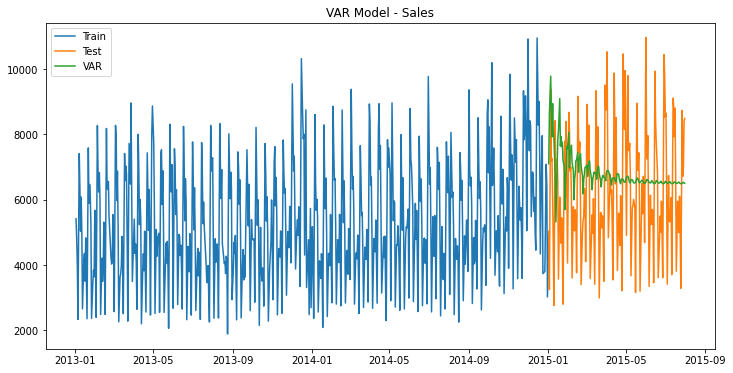

In [ ]:
plt.figure(figsize=(12,6)) 
plt.plot(train8['Sales'], label='Train')
plt.plot(test8['Sales'], label='Test')
plt.plot(df_forecast['Sales_fc'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

## Cointegration 9

In [ ]:
# applying Johansen test
joh_model1 = coint_johansen(store9[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)

traces = joh_model1.lr1
maxeig=joh_model1.lr2
cvts = joh_model1.cvt  ## 0: 90%  1:95% 2: 99%
cvms = joh_model1.cvm   ## 0: 90%  1:95% 2: 99%			

In [ ]:
# looking for the rank
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

rank=select_coint_rank(store9[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)
print(rank.rank)

4


In [ ]:
# with another method looking for cointegration

coint(store9['DayOfWeek'],store9['Sales'])

(-3.4060021236167137,
 0.04168817877165253,
 array([-3.91057238, -3.34399487, -3.04990591]))

In [ ]:
print('cointegration between DayOfWeek and Sales:',coint(store9['DayOfWeek'],store9['Sales']))
print('cointegration between DayOfWeek and Customers:',coint(store9['DayOfWeek'],store9['Customers']))
print('cointegration between DayOfWeek and Promo:',coint(store9['DayOfWeek'],store9['Promo']))
print('cointegration between DayOfWeek and SchoolHoliday:',coint(store9['DayOfWeek'],store9['SchoolHoliday']))
print('cointegration between Sales and Customers:',coint(store9['Sales'],store9['Customers']))
print('cointegration between Sales and Promo:',coint(store9['Sales'],store9['Promo']))
print('cointegration between Sales and SchoolHoliday:',coint(store9['Sales'],store9['SchoolHoliday']))
print('cointegration between Promo and Customers:',coint(store9['Promo'],store9['Customers']))
print('cointegration between Promo and SchoolHoliday:',coint(store9['Promo'],store9['SchoolHoliday']))
print('cointegration between Customers and SchoolHoliday:',coint(store9['Customers'],store9['SchoolHoliday']))

cointegration between DayOfWeek and Sales: (-3.4060021236167137, 0.04168817877165253, array([-3.91057238, -3.34399487, -3.04990591]))
cointegration between DayOfWeek and Customers: (-3.276283289267055, 0.05806984989214745, array([-3.91057238, -3.34399487, -3.04990591]))
cointegration between DayOfWeek and Promo: (-8.820041583547372, 2.509367577039136e-13, array([-3.91057238, -3.34399487, -3.04990591]))
cointegration between DayOfWeek and SchoolHoliday: (-5.249306769448552, 5.584765298118348e-05, array([-3.91057238, -3.34399487, -3.04990591]))
cointegration between Sales and Customers: (-4.671634683002064, 0.0006308688879795605, array([-3.91057238, -3.34399487, -3.04990591]))
cointegration between Sales and Promo: (-2.62808316678425, 0.2265025213465115, array([-3.91057238, -3.34399487, -3.04990591]))
cointegration between Sales and SchoolHoliday: (-2.658712433026597, 0.21477817575727304, array([-3.91057238, -3.34399487, -3.04990591]))
cointegration between Promo and Customers: (-3.97998

# **Model building for StoreId 13**

In [ ]:
store13 = df4[df4["Store"].isin([13])]
store13.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,


## **No data for storeID 13 hence no forecast**

# **Model building for StoreId 25**

In [ ]:
store25 = df4[df4["Store"].isin([25])]
store25.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2015-07-31,25,5,14180,1586,1,1,1,1,430.0,4,2003.0,0
2015-07-30,25,4,11272,1422,1,1,1,1,430.0,4,2003.0,0
2015-07-29,25,3,10527,1254,1,1,1,1,430.0,4,2003.0,0
2015-07-28,25,2,10865,1363,1,1,1,1,430.0,4,2003.0,0
2015-07-27,25,1,11806,1536,1,1,1,1,430.0,4,2003.0,0


In [ ]:
store25 = store25.sort_index()

In [ ]:
store25.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-09', '2013-01-10', '2013-01-11', '2013-01-12',
               '2013-01-14', '2013-01-15',
               ...
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=621, freq=None)

In [ ]:
store25 = store25[['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']]

In [ ]:
from sklearn.model_selection import train_test_split
train25 = store25.loc['2013-1-02':'2015-1-02']
test25 = store25.loc['2015-1-02':]
train25.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
Date,,,,,
2013-01-02,3,11944,1698,0,1
2013-01-03,4,10409,1587,0,1
2013-01-04,5,9729,1520,0,1
2013-01-05,6,8987,1381,0,0
2013-01-09,3,11539,1638,1,0


In [ ]:
ls= ['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']
for i in range(len(ls)):
    print('\n\n' + ls[i] + ': ADF test results:')
    result = adfuller(train25[ls[i]].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))
            



DayOfWeek: ADF test results:
ADF Statistic: -3.790365
p-value: 0.003007
Critical Values:
	5%: -2.868


Sales: ADF test results:
ADF Statistic: -5.493657
p-value: 0.000002
Critical Values:
	5%: -2.868


Customers: ADF test results:
ADF Statistic: -4.544328
p-value: 0.000163
Critical Values:
	5%: -2.868


Promo: ADF test results:
ADF Statistic: -3.846201
p-value: 0.002468
Critical Values:
	5%: -2.868


SchoolHoliday: ADF test results:
ADF Statistic: -4.665475
p-value: 0.000098
Critical Values:
	5%: -2.868


In [ ]:
model = VAR(train25)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  18.74991423048806
BIC :  19.018457405233626
FPE :  138991249.04943407
HQIC:  18.85564178252832 

Lag Order = 2
AIC :  18.067633427083436
BIC :  18.56077202223488
FPE :  70257577.6681697
HQIC:  18.261803452900732 

Lag Order = 3
AIC :  17.873179912724645
BIC :  18.591654084808667
FPE :  57847470.45761881
HQIC:  18.15609984656299 

Lag Order = 4
AIC :  17.735213782188264
BIC :  18.67976775180996
FPE :  50401596.541290544
HQIC:  18.10719277413379 

Lag Order = 5
AIC :  17.653494184945945
BIC :  18.824876267773114
FPE :  46460134.8495263
HQIC:  18.11484311404162 

Lag Order = 6
AIC :  17.539890146322108
BIC :  18.938852784371566
FPE :  41488774.885833934
HQIC:  18.09092163380958 

Lag Order = 7
AIC :  17.54740120784786
BIC :  19.17470100107722
FPE :  41826787.84259211
HQIC:  18.188429630537833 

Lag Order = 8
AIC :  17.56545447119111
BIC :  19.42185220939978
FPE :  42623032.51898516
HQIC:  18.29679597496384 

Lag Order = 9
AIC :  17.59322826958364
BIC :  19.67948896462

In [ ]:
x25= model.select_order(12)
x25.summary()

,AIC,BIC,FPE,HQIC
0,20.59,20.63,8.726e+08,20.60
1,18.78,19.05,1.427e+08,18.88
2,18.10,18.60*,7.263e+07,18.30
3,17.91,18.64,6.004e+07,18.20
4,17.77,18.73,5.235e+07,18.15
5,17.69,18.88,4.826e+07,18.16
6,17.58*,18.99,4.306e+07*,18.13*
7,17.58,19.22,4.329e+07,18.23
8,17.60,19.47,4.400e+07,18.33
9,17.63,19.72,4.532e+07,18.45


In [ ]:
result_var25 = model.fit(6)
result_var25.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Jul, 2021
Time:                     17:51:08
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    18.9389
Nobs:                     457.000    HQIC:                   18.0909
Log likelihood:          -7095.14    FPE:                4.14888e+07
AIC:                      17.5399    Det(Omega_mle):     2.98822e+07
--------------------------------------------------------------------
Results for equation DayOfWeek
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.124781         0.929319           -0.134           0.893
L1.DayOfWeek             0.397784         0.063222            6.292           0.000
L1.Sales                -0.000328         0.

In [ ]:
# Get the lag order
lag_order = result_var25.k_ar
print(lag_order)  #> 1

# Input data for forecasting
forecast_input = train25.values[-lag_order:]
forecast_input

6


array([[    3,  7858,   978,     0,     1],
       [    6, 10386,  1337,     0,     0],
       [    1, 12261,  1622,     0,     1],
       [    2, 14354,  1844,     0,     1],
       [    3,  7771,   925,     0,     1],
       [    5, 11100,  1491,     0,     1]])

In [ ]:
test25.shape

(159, 5)

In [ ]:
fc = result_var25.forecast(y=forecast_input, steps= 159)
df_forecast = pd.DataFrame(fc, index=test25.index[-159:], columns= test25.columns + '_fc')
df_forecast

,DayOfWeek_fc,Sales_fc,Customers_fc,Promo_fc,SchoolHoliday_fc
Date,,,,,
2015-01-02,4.502527,11647.572345,1532.935910,0.392481,1.080960
2015-01-03,5.770478,8091.752975,1072.654256,0.190071,0.738581
2015-01-06,2.128965,11907.285857,1584.283960,0.866590,0.899147
2015-01-07,2.731731,10264.414712,1391.253994,0.845575,0.973859
2015-01-08,4.321090,8486.298495,1207.357672,0.347673,0.845888
...,...,...,...,...,...
2015-07-27,3.756333,10125.160681,1471.396638,0.355327,0.238919
2015-07-28,3.756417,10125.302103,1471.406063,0.355389,0.238909
2015-07-29,3.756467,10125.441048,1471.416971,0.355458,0.238901


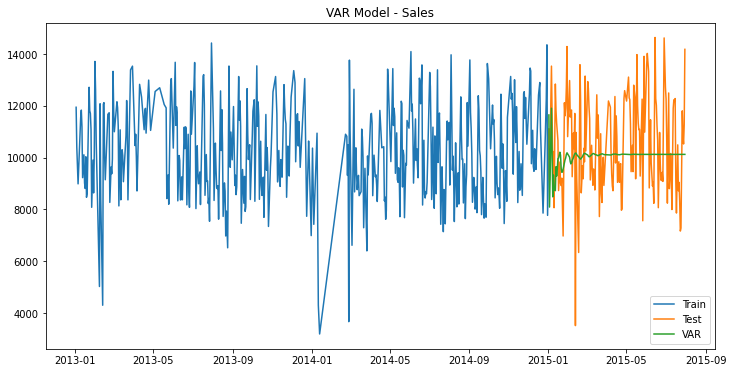

In [ ]:
plt.figure(figsize=(12,6)) 
plt.plot(train25['Sales'], label='Train')
plt.plot(test25['Sales'], label='Test')
plt.plot(df_forecast['Sales_fc'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

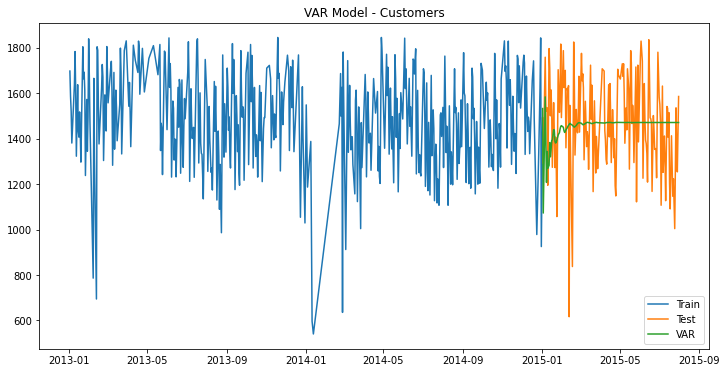

In [ ]:
plt.figure(figsize=(12,6)) 
plt.plot(train25['Customers'], label='Train')
plt.plot(test25['Customers'], label='Test')
plt.plot(df_forecast['Customers_fc'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Customers')
plt.show()

## Cointegration 25

In [ ]:
# applying Johansen test
joh_model1 = coint_johansen(store25[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)

traces = joh_model1.lr1
maxeig=joh_model1.lr2
cvts = joh_model1.cvt  ## 0: 90%  1:95% 2: 99%
cvms = joh_model1.cvm   ## 0: 90%  1:95% 2: 99%			

In [ ]:
rank=select_coint_rank(store25[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)
print(rank.rank)

4


In [ ]:
# with another method looking for cointegration

coint(store25['DayOfWeek'],store25['Sales'])

(-4.965029236504795,
 0.00019081613135561452,
 array([-3.91419157, -3.34600275, -3.05129772]))

In [ ]:
print('cointegration between DayOfWeek and Sales:',coint(store25['DayOfWeek'],store25['Sales']))
print('cointegration between DayOfWeek and Customers:',coint(store25['DayOfWeek'],store25['Customers']))
print('cointegration between DayOfWeek and Promo:',coint(store25['DayOfWeek'],store25['Promo']))
print('cointegration between DayOfWeek and SchoolHoliday:',coint(store25['DayOfWeek'],store25['SchoolHoliday']))
print('cointegration between Sales and Customers:',coint(store25['Sales'],store25['Customers']))
print('cointegration between Sales and Promo:',coint(store25['Sales'],store25['Promo']))
print('cointegration between Sales and SchoolHoliday:',coint(store25['Sales'],store25['SchoolHoliday']))
print('cointegration between Promo and Customers:',coint(store25['Promo'],store25['Customers']))
print('cointegration between Promo and SchoolHoliday:',coint(store25['Promo'],store25['SchoolHoliday']))
print('cointegration between Customers and SchoolHoliday:',coint(store25['Customers'],store25['SchoolHoliday']))

cointegration between DayOfWeek and Sales: (-4.965029236504795, 0.00019081613135561452, array([-3.91419157, -3.34600275, -3.05129772]))
cointegration between DayOfWeek and Customers: (-4.468855611967579, 0.0013772115186656924, array([-3.91419157, -3.34600275, -3.05129772]))
cointegration between DayOfWeek and Promo: (-5.722636425850756, 6.282119989359846e-06, array([-3.91419157, -3.34600275, -3.05129772]))
cointegration between DayOfWeek and SchoolHoliday: (-6.039875282808713, 1.3310853018290875e-06, array([-3.91419157, -3.34600275, -3.05129772]))
cointegration between Sales and Customers: (-3.218009996161025, 0.06696722418706628, array([-3.91419157, -3.34600275, -3.05129772]))
cointegration between Sales and Promo: (-10.4425632716755, 1.9355854833641027e-17, array([-3.91419157, -3.34600275, -3.05129772]))
cointegration between Sales and SchoolHoliday: (-6.113793541598589, 9.187856498784706e-07, array([-3.91419157, -3.34600275, -3.05129772]))
cointegration between Promo and Customers: 

Here DayOfweekand customers, Sales and customers,Promo and SchoolHoliday since there values are less that critical value nd hence null hypethesis is rejected.

# **Model building for StoreId 29**

In [ ]:
store29 = df4[df4["Store"].isin([29])]
store29.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2015-07-31,29,5,9411,737,1,1,2,2,2170.0,8,2012.0,0
2015-07-30,29,4,8039,661,1,1,2,2,2170.0,8,2012.0,0
2015-07-29,29,3,7564,614,1,1,2,2,2170.0,8,2012.0,0
2015-07-28,29,2,8450,697,1,1,2,2,2170.0,8,2012.0,0
2015-07-27,29,1,11659,889,1,1,2,2,2170.0,8,2012.0,0


In [ ]:
store29 = store29.sort_index()

In [ ]:
store29 = store29[['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']]

In [ ]:
store29.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-12',
               ...
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=773, freq=None)

In [ ]:
from sklearn.model_selection import train_test_split
train29 = store29.loc['2013-1-02':'2015-1-02']
test29 = store29.loc['2015-1-02':]
train29.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
Date,,,,,
2013-01-02,3,5269,550,0,1
2013-01-03,4,4554,456,0,1
2013-01-04,5,5411,505,0,1
2013-01-05,6,5564,537,0,0
2013-01-07,1,10796,863,1,0


In [ ]:
ls= ['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']
for i in range(len(ls)):
    print('\n\n' + ls[i] + ': ADF test results:')
    result = adfuller(train29[ls[i]].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



DayOfWeek: ADF test results:
ADF Statistic: -7.418390
p-value: 0.000000
Critical Values:
	5%: -2.866


Sales: ADF test results:
ADF Statistic: -2.953880
p-value: 0.039432
Critical Values:
	5%: -2.866


Customers: ADF test results:
ADF Statistic: -2.736139
p-value: 0.067991
Critical Values:
	5%: -2.866


Promo: ADF test results:
ADF Statistic: -6.239334
p-value: 0.000000
Critical Values:
	5%: -2.867


SchoolHoliday: ADF test results:
ADF Statistic: -4.593934
p-value: 0.000133
Critical Values:
	5%: -2.866


In [ ]:
model = VAR(train29)
x29= model.select_order(12)
x29.summary()

,AIC,BIC,FPE,HQIC
0,19.18,19.22,2.147e+08,19.20
1,16.34,16.56,1.249e+07,16.43
2,15.41,15.82,4.916e+06,15.57
3,14.95,15.55,3.123e+06,15.19
4,14.51,15.29,2.007e+06,14.82
5,13.96,14.92,1.151e+06,14.33
6,13.68,14.83*,8.762e+05,14.13
7,13.53,14.87,7.542e+05,14.05*
8,13.52,15.04,7.451e+05,14.11
9,13.51,15.22,7.398e+05,14.18


In [ ]:
result_var29 = model.fit(12)
result_var29.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Jul, 2021
Time:                     17:51:09
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    15.6990
Nobs:                     590.000    HQIC:                   14.3168
Log likelihood:          -7844.09    FPE:                    685813.
AIC:                      13.4347    Det(Omega_mle):         419335.
--------------------------------------------------------------------
Results for equation DayOfWeek
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     7.569866         1.458386            5.191           0.000
L1.DayOfWeek              0.069242         0.057009            1.215           0.225
L1.Sales                 -0.000067      

In [ ]:
# Get the lag order
lag_order = result_var29.k_ar
print(lag_order)  #> 1

# Input data for forecasting
forecast_input = train29.values[-lag_order:]
forecast_input

12


array([[    3, 10811,   782,     1,     0],
       [    4, 12069,   920,     1,     0],
       [    5, 11650,   891,     1,     0],
       [    6, 11284,   896,     0,     0],
       [    1, 13589,  1115,     0,     1],
       [    2, 13202,  1125,     0,     1],
       [    3,  5861,   516,     0,     1],
       [    6,  7162,   659,     0,     0],
       [    1,  7742,   708,     0,     1],
       [    2,  9478,   798,     0,     1],
       [    3,  4890,   429,     0,     1],
       [    5,  7949,   726,     0,     1]])

In [ ]:
test29.shape

(172, 5)

In [ ]:
fc = result_var29.forecast(y=forecast_input, steps= 172)
df_forecast = pd.DataFrame(fc, index=test29.index[-172:], columns= test29.columns + '_fc')
df_forecast

,DayOfWeek_fc,Sales_fc,Customers_fc,Promo_fc,SchoolHoliday_fc
Date,,,,,
2015-01-02,5.390814,7918.382894,688.611593,0.085061,0.702688
2015-01-03,4.387978,9727.148669,796.216812,0.149825,0.605724
2015-01-05,1.101777,11059.656659,834.058134,1.011418,0.957659
2015-01-06,3.197661,9941.591569,811.541335,1.029443,0.588853
2015-01-07,4.088217,9906.243037,810.175382,1.334976,0.464942
...,...,...,...,...,...
2015-07-27,3.473781,7244.565462,650.205741,0.437851,0.206906
2015-07-28,3.474085,7232.553295,649.311961,0.440433,0.207782
2015-07-29,3.508180,7222.673433,648.771999,0.440702,0.207192


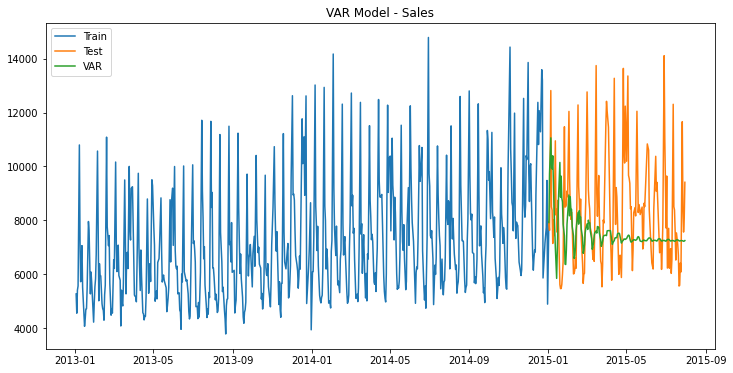

In [ ]:
plt.figure(figsize=(12,6)) 
plt.plot(train29['Sales'], label='Train')
plt.plot(test29['Sales'], label='Test')
plt.plot(df_forecast['Sales_fc'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

## Cointegration 29

In [ ]:
# applying Johansen test
joh_model1 = coint_johansen(store29[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)

traces = joh_model1.lr1
maxeig=joh_model1.lr2
cvts = joh_model1.cvt  ## 0: 90%  1:95% 2: 99%
cvms = joh_model1.cvm   ## 0: 90%  1:95% 2: 99%			

In [ ]:
rank=select_coint_rank(store29[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)
print(rank.rank)

4


In [ ]:
# with another method looking for cointegration

coint(store29['DayOfWeek'],store29['Sales'])

(-3.951740426732142,
 0.00840383166347563,
 array([-3.91068265, -3.34405609, -3.04994835]))

In [ ]:
print('cointegration between DayOfWeek and Sales:',coint(store29['DayOfWeek'],store29['Sales']))
print('cointegration between DayOfWeek and Customers:',coint(store29['DayOfWeek'],store29['Customers']))
print('cointegration between DayOfWeek and Promo:',coint(store29['DayOfWeek'],store29['Promo']))
print('cointegration between DayOfWeek and SchoolHoliday:',coint(store29['DayOfWeek'],store29['SchoolHoliday']))
print('cointegration between Sales and Customers:',coint(store29['Sales'],store29['Customers']))
print('cointegration between Sales and Promo:',coint(store29['Sales'],store29['Promo']))
print('cointegration between Sales and SchoolHoliday:',coint(store29['Sales'],store29['SchoolHoliday']))
print('cointegration between Promo and Customers:',coint(store29['Promo'],store29['Customers']))
print('cointegration between Promo and SchoolHoliday:',coint(store29['Promo'],store29['SchoolHoliday']))
print('cointegration between Customers and SchoolHoliday:',coint(store29['Customers'],store29['SchoolHoliday']))

cointegration between DayOfWeek and Sales: (-3.951740426732142, 0.00840383166347563, array([-3.91068265, -3.34405609, -3.04994835]))
cointegration between DayOfWeek and Customers: (-3.9492674704005775, 0.008471242323070649, array([-3.91068265, -3.34405609, -3.04994835]))
cointegration between DayOfWeek and Promo: (-8.986110550926236, 9.445762326214372e-14, array([-3.91068265, -3.34405609, -3.04994835]))
cointegration between DayOfWeek and SchoolHoliday: (-5.161500262711074, 8.220275656415012e-05, array([-3.91068265, -3.34405609, -3.04994835]))
cointegration between Sales and Customers: (-3.8836254442376634, 0.01044757949264184, array([-3.91068265, -3.34405609, -3.04994835]))
cointegration between Sales and Promo: (-3.4909492311962147, 0.033206197326522795, array([-3.91068265, -3.34405609, -3.04994835]))
cointegration between Sales and SchoolHoliday: (-3.3572820915551778, 0.04732159389820667, array([-3.91068265, -3.34405609, -3.04994835]))
cointegration between Promo and Customers: (-3.

HereDayOfweek Sales , customers,Promo,SchoolHoliday since there values are less that critical value nd hence null hypethesis is rejected.

# **Model building for StoreId 31**

In [ ]:
store31 = df4[df4["Store"].isin([31])]
store31.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2015-07-31,31,5,7248,645,1,1,2,2,9800.0,7,2012.0,0
2015-07-30,31,4,6712,582,1,1,2,2,9800.0,7,2012.0,0
2015-07-29,31,3,5982,570,1,1,2,2,9800.0,7,2012.0,0
2015-07-28,31,2,5736,492,1,1,2,2,9800.0,7,2012.0,0
2015-07-27,31,1,8054,684,1,1,2,2,9800.0,7,2012.0,0


In [ ]:
store31 = store31.sort_index()

In [ ]:
store31 = store31[['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']]

In [ ]:
store31.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-12',
               ...
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=784, freq=None)

In [ ]:
from sklearn.model_selection import train_test_split
train31 = store31.loc['2013-1-02':'2015-1-02']
test31 = store31.loc['2015-1-02':]
train31.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
Date,,,,,
2013-01-02,3,5122,567,0,1
2013-01-03,4,5623,578,0,1
2013-01-04,5,6140,633,0,1
2013-01-05,6,5607,624,0,0
2013-01-07,1,7857,743,1,0


In [ ]:
ls= ['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']
for i in range(len(ls)):
    print('\n\n' + ls[i] + ': ADF test results:')
    result = adfuller(train31[ls[i]].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



DayOfWeek: ADF test results:
ADF Statistic: -10.169600
p-value: 0.000000
Critical Values:
	5%: -2.866


Sales: ADF test results:
ADF Statistic: -4.341776
p-value: 0.000376
Critical Values:
	5%: -2.866


Customers: ADF test results:
ADF Statistic: -4.656846
p-value: 0.000101
Critical Values:
	5%: -2.866


Promo: ADF test results:
ADF Statistic: -6.486643
p-value: 0.000000
Critical Values:
	5%: -2.866


SchoolHoliday: ADF test results:
ADF Statistic: -4.948337
p-value: 0.000028
Critical Values:
	5%: -2.866


In [ ]:
model = VAR(train31)
x31= model.select_order(12)
x31.summary()

,AIC,BIC,FPE,HQIC
0,18.55,18.59,1.139e+08,18.57
1,15.94,16.16,8.402e+06,16.03
2,14.97,15.37,3.158e+06,15.12
3,14.53,15.12,2.051e+06,14.76
4,13.98,14.75,1.179e+06,14.28
5,13.11,14.07,4.948e+05,13.48
6,12.91,14.05,4.045e+05,13.35
7,12.69,14.01*,3.247e+05,13.21*
8,12.67,14.18,3.183e+05,13.26
9,12.69,14.39,3.263e+05,13.35


In [ ]:
result_var31 = model.fit(7)
result_var31.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Jul, 2021
Time:                     17:51:10
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    13.9818
Nobs:                     602.000    HQIC:                   13.1782
Log likelihood:          -7903.49    FPE:                    317040.
AIC:                      12.6661    Det(Omega_mle):         237134.
--------------------------------------------------------------------
Results for equation DayOfWeek
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   12.244475         0.948400           12.911           0.000
L1.DayOfWeek            -0.086891         0.051244           -1.696           0.090
L1.Sales                -0.000284         0.

In [ ]:
# Get the lag order
lag_order = result_var31.k_ar
print(lag_order)  #> 1

# Input data for forecasting
forecast_input = train31.values[-lag_order:]
forecast_input

7


array([[    2, 11487,  1045,     0,     1],
       [    3,  4250,   443,     0,     1],
       [    6,  6474,   688,     0,     0],
       [    1,  6853,   660,     0,     1],
       [    2,  7851,   733,     0,     1],
       [    3,  3150,   363,     0,     1],
       [    5,  5807,   587,     0,     1]])

In [ ]:
test31.shape

(176, 5)

In [ ]:
fc = result_var31.forecast(y=forecast_input, steps= 176)
df_forecast = pd.DataFrame(fc, index=test31.index[-176:], columns= test31.columns + '_fc')
df_forecast

,DayOfWeek_fc,Sales_fc,Customers_fc,Promo_fc,SchoolHoliday_fc
Date,,,,,
2015-01-02,4.522749,6044.751986,578.563327,0.195033,0.859389
2015-01-03,5.231893,5931.485097,615.964125,-0.208943,0.505348
2015-01-05,0.642937,6716.539183,601.445520,0.659481,0.942470
2015-01-06,2.841560,6417.567336,598.765862,0.628438,0.819428
2015-01-07,3.114629,6532.189860,590.531388,0.840873,0.751167
...,...,...,...,...,...
2015-07-27,3.553661,5900.476657,593.779752,0.443746,0.210692
2015-07-28,3.482711,5894.339327,592.899034,0.444420,0.211941
2015-07-29,3.438474,5880.076445,591.413321,0.447619,0.214403


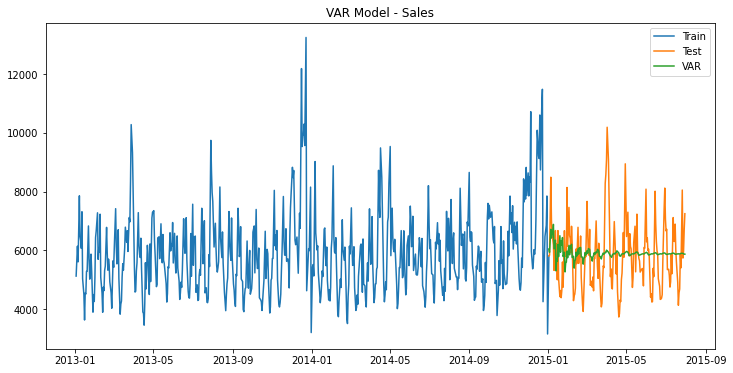

In [ ]:
plt.figure(figsize=(12,6)) 
plt.plot(train31['Sales'], label='Train')
plt.plot(test31['Sales'], label='Test')
plt.plot(df_forecast['Sales_fc'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

## Cointegration 31

In [ ]:
# applying Johansen test
joh_model1 = coint_johansen(store31[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)

traces = joh_model1.lr1
maxeig=joh_model1.lr2
cvts = joh_model1.cvt  ## 0: 90%  1:95% 2: 99%
cvms = joh_model1.cvm   ## 0: 90%  1:95% 2: 99%			

In [ ]:
rank=select_coint_rank(store31[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)
print(rank.rank)

4


In [ ]:
# with another method looking for cointegration

coint(store31['DayOfWeek'],store31['Sales'])

(-5.953885057374797,
 2.040108337414758e-06,
 array([-3.91048179, -3.34394458, -3.04987104]))

In [ ]:
coint(store31['DayOfWeek'],store31['Promo'])

(-8.597035919719014,
 9.300639878815377e-13,
 array([-3.91048179, -3.34394458, -3.04987104]))

In [ ]:
print('cointegration between DayOfWeek and Sales:',coint(store31['DayOfWeek'],store31['Sales']))
print('cointegration between DayOfWeek and Customers:',coint(store31['DayOfWeek'],store31['Customers']))
print('cointegration between DayOfWeek and Promo:',coint(store31['DayOfWeek'],store31['Promo']))
print('cointegration between DayOfWeek and SchoolHoliday:',coint(store31['DayOfWeek'],store31['SchoolHoliday']))
print('cointegration between Sales and Customers:',coint(store31['Sales'],store31['Customers']))
print('cointegration between Sales and Promo:',coint(store31['Sales'],store31['Promo']))
print('cointegration between Sales and SchoolHoliday:',coint(store31['Sales'],store31['SchoolHoliday']))
print('cointegration between Promo and Customers:',coint(store31['Promo'],store31['Customers']))
print('cointegration between Promo and SchoolHoliday:',coint(store31['Promo'],store31['SchoolHoliday']))
print('cointegration between Customers and SchoolHoliday:',coint(store31['Customers'],store31['SchoolHoliday']))

cointegration between DayOfWeek and Sales: (-5.953885057374797, 2.040108337414758e-06, array([-3.91048179, -3.34394458, -3.04987104]))
cointegration between DayOfWeek and Customers: (-6.649778176653804, 5.699311849437452e-08, array([-3.91048179, -3.34394458, -3.04987104]))
cointegration between DayOfWeek and Promo: (-8.597035919719014, 9.300639878815377e-13, array([-3.91048179, -3.34394458, -3.04987104]))
cointegration between DayOfWeek and SchoolHoliday: (-6.075585164607569, 1.1132955068459475e-06, array([-3.91048179, -3.34394458, -3.04987104]))
cointegration between Sales and Customers: (-4.101013046564107, 0.005127069014244555, array([-3.91048179, -3.34394458, -3.04987104]))
cointegration between Sales and Promo: (-5.55200378170738, 1.4073253395537863e-05, array([-3.91048179, -3.34394458, -3.04987104]))
cointegration between Sales and SchoolHoliday: (-5.871553748139025, 3.0570656009320074e-06, array([-3.91048179, -3.34394458, -3.04987104]))
cointegration between Promo and Customers:

Here Sales , customers since there values are less that critical value nd hence null hypethesis is rejected.

# **Model building for StoreId 46**

In [ ]:
store46 = df4[df4["Store"].isin([46])]
store46.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
Date,,,,,,,,,,,,
2015-07-31,46,5,7628,775,1,0,1,1,1200.0,9,2005.0,1
2015-07-30,46,4,7057,760,1,0,1,1,1200.0,9,2005.0,1
2015-07-29,46,3,6955,716,1,0,1,1,1200.0,9,2005.0,1
2015-07-28,46,2,6385,714,1,0,1,1,1200.0,9,2005.0,1
2015-07-27,46,1,10068,896,1,0,1,1,1200.0,9,2005.0,1


In [ ]:
store46 = store46.sort_index()

In [ ]:
store46 = store46[['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']]

In [ ]:
store46.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-12',
               ...
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=622, freq=None)

In [ ]:
from sklearn.model_selection import train_test_split
train46 = store46.loc['2013-1-02':'2015-1-02']
test46 = store46.loc['2015-1-02':]
train46.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
Date,,,,,
2013-01-02,3,4016,582,0,1
2013-01-03,4,4177,553,0,1
2013-01-04,5,4125,569,0,1
2013-01-05,6,4848,651,0,0
2013-01-07,1,7788,825,1,0


In [ ]:
ls= ['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday']
for i in range(len(ls)):
    print('\n\n' + ls[i] + ': ADF test results:')
    result = adfuller(train46[ls[i]].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



DayOfWeek: ADF test results:
ADF Statistic: -9.194421
p-value: 0.000000
Critical Values:
	5%: -2.868


Sales: ADF test results:
ADF Statistic: -4.148133
p-value: 0.000806
Critical Values:
	5%: -2.868


Customers: ADF test results:
ADF Statistic: -4.108497
p-value: 0.000938
Critical Values:
	5%: -2.868


Promo: ADF test results:
ADF Statistic: -4.630535
p-value: 0.000113
Critical Values:
	5%: -2.868


SchoolHoliday: ADF test results:
ADF Statistic: -6.141434
p-value: 0.000000
Critical Values:
	5%: -2.868


In [ ]:
model = VAR(train46)
x46= model.select_order(12)
x46.summary()

,AIC,BIC,FPE,HQIC
0,18.67,18.72,1.282e+08,18.69
1,15.97,16.25,8.658e+06,16.08
2,15.04,15.55,3.400e+06,15.24
3,14.69,15.43,2.390e+06,14.98
4,14.16,15.14,1.406e+06,14.54
5,13.50,14.72*,7.320e+05,13.98
6,13.34,14.79,6.213e+05,13.91*
7,13.26*,14.94,5.723e+05*,13.92
8,13.30,15.21,5.981e+05,14.05
9,13.33,15.48,6.192e+05,14.18


In [ ]:
result_var46 = model.fit(7)
result_var46.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Jul, 2021
Time:                     17:51:12
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    14.8792
Nobs:                     442.000    HQIC:                   13.8703
Log likelihood:          -5875.95    FPE:                    548482.
AIC:                      13.2131    Det(Omega_mle):         370795.
--------------------------------------------------------------------
Results for equation DayOfWeek
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    9.391293         1.095567            8.572           0.000
L1.DayOfWeek            -0.055538         0.065659           -0.846           0.398
L1.Sales                -0.000027         0.

In [ ]:
# Get the lag order
lag_order = result_var46.k_ar
print(lag_order)  #> 1

# Input data for forecasting
forecast_input = train46.values[-lag_order:]
forecast_input

7


array([[    2,  3812,   563,     0,     0],
       [    3,  3344,   500,     0,     0],
       [    4,  3323,   488,     0,     0],
       [    5,  4918,   606,     0,     0],
       [    6,  5509,   712,     0,     0],
       [    1, 11673,  1092,     1,     0],
       [    5,  4147,   615,     0,     1]])

In [ ]:
test46.shape

(174, 5)

In [ ]:
fc = result_var46.forecast(y=forecast_input, steps= 174)
df_forecast = pd.DataFrame(fc, index=test46.index[-174:], columns= test46.columns + '_fc')
df_forecast

,DayOfWeek_fc,Sales_fc,Customers_fc,Promo_fc,SchoolHoliday_fc
Date,,,,,
2015-01-02,1.913164,6634.265770,720.117062,0.716881,0.851429
2015-01-03,3.617748,6953.700704,787.928302,0.817823,0.701319
2015-01-05,4.299248,6654.936371,775.968321,0.799911,0.661862
2015-01-07,5.257042,5178.445156,703.033840,-0.140055,0.410496
2015-01-08,0.172635,5655.491824,677.559827,0.748402,0.589515
...,...,...,...,...,...
2015-07-27,3.521253,5292.321477,662.111648,0.426114,0.200545
2015-07-28,3.517165,5289.111315,661.818663,0.423195,0.200729
2015-07-29,3.514586,5289.535901,661.757553,0.422159,0.200940


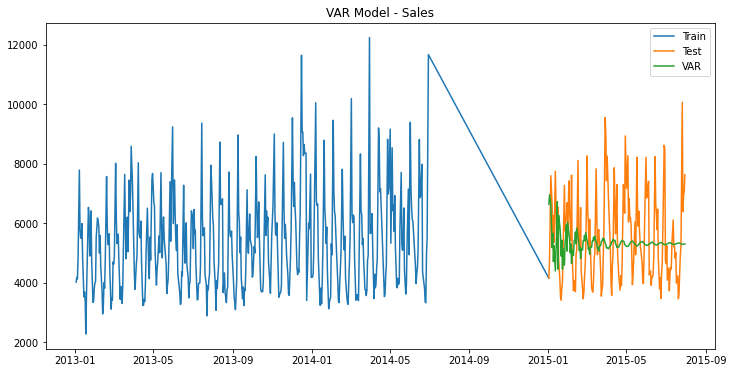

In [ ]:
plt.figure(figsize=(12,6)) 
plt.plot(train46['Sales'], label='Train')
plt.plot(test46['Sales'], label='Test')
plt.plot(df_forecast['Sales_fc'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

## Cointegration 46

In [ ]:
# applying Johansen test
joh_model1 = coint_johansen(store46[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,1)

traces = joh_model1.lr1
maxeig=joh_model1.lr2
cvts = joh_model1.cvt  ## 0: 90%  1:95% 2: 99%
cvms = joh_model1.cvm   ## 0: 90%  1:95% 2: 99%			

In [ ]:
rank=select_coint_rank(store46[['DayOfWeek','Sales','Customers','Promo','SchoolHoliday']],-1,7)
print(rank.rank)

4


In [ ]:
# with another method looking for cointegration

coint(store46['DayOfWeek'],store46['Sales'])

(-5.225678993376931,
 6.200730321623865e-05,
 array([-3.91416285, -3.34598682, -3.05128668]))

In [ ]:
print('cointegration between DayOfWeek and Sales:',coint(store46['DayOfWeek'],store46['Sales']))
print('cointegration between DayOfWeek and Customers:',coint(store46['DayOfWeek'],store46['Customers']))
print('cointegration between DayOfWeek and Promo:',coint(store46['DayOfWeek'],store46['Promo']))
print('cointegration between DayOfWeek and SchoolHoliday:',coint(store46['DayOfWeek'],store46['SchoolHoliday']))
print('cointegration between Sales and Customers:',coint(store46['Sales'],store46['Customers']))
print('cointegration between Sales and Promo:',coint(store46['Sales'],store46['Promo']))
print('cointegration between Sales and SchoolHoliday:',coint(store46['Sales'],store46['SchoolHoliday']))
print('cointegration between Promo and Customers:',coint(store46['Promo'],store46['Customers']))
print('cointegration between Promo and SchoolHoliday:',coint(store46['Promo'],store46['SchoolHoliday']))
print('cointegration between Customers and SchoolHoliday:',coint(store46['Customers'],store46['SchoolHoliday']))

cointegration between DayOfWeek and Sales: (-5.225678993376931, 6.200730321623865e-05, array([-3.91416285, -3.34598682, -3.05128668]))
cointegration between DayOfWeek and Customers: (-6.795822771282104, 2.605120957781612e-08, array([-3.91416285, -3.34598682, -3.05128668]))
cointegration between DayOfWeek and Promo: (-7.14493444449211, 3.861703590263863e-09, array([-3.91416285, -3.34598682, -3.05128668]))
cointegration between DayOfWeek and SchoolHoliday: (-5.962630662767279, 1.9538186392778914e-06, array([-3.91416285, -3.34598682, -3.05128668]))
cointegration between Sales and Customers: (-4.1272531927823675, 0.004689261508255061, array([-3.91416285, -3.34598682, -3.05128668]))
cointegration between Sales and Promo: (-4.6768763214445235, 0.0006179517122024678, array([-3.91416285, -3.34598682, -3.05128668]))
cointegration between Sales and SchoolHoliday: (-5.221385475566835, 6.319444785738316e-05, array([-3.91416285, -3.34598682, -3.05128668]))
cointegration between Promo and Customers:

Here Sales , customers and  Sale, Promo are cointegrated,since there values are less that critical value nd hence null hypethesis is rejected.

There are number of ways of finding cointegration.
statsmodels.tsa.stattools.coint approach which is shown above.
The Null hypothesis is that there is no cointegration, the alternative hypothesis is that there is cointegrating relationship. If the pvalue is small, below a critical size, then we can reject the hypothesis that there is no cointegrating relationship.